In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("Task 3 and 4_Loan_Data.csv")
df.head()

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0


In [4]:
df["fico_score"].describe()

,fico_score
count,10000.000000
mean,637.557700
std,60.657906
min,408.000000
25%,597.000000
50%,638.000000
75%,679.000000
max,850.000000


In [8]:
df["fico_score"].describe()["25%"]

597.0

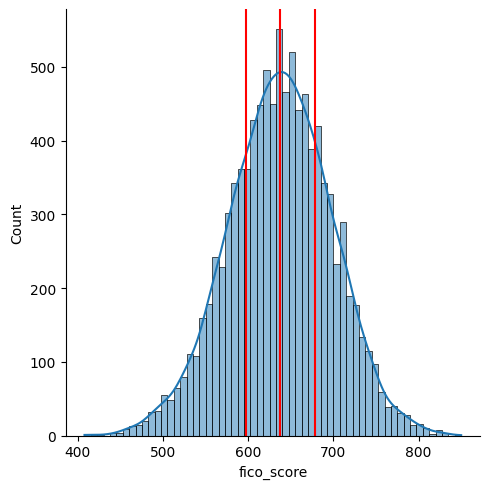

In [19]:
import seaborn as sns
sns.displot(df["fico_score"], kde=True)
plt.axvline(x=df["fico_score"].describe()["25%"], color = "red")
plt.axvline(x=df["fico_score"].describe()["50%"], color = "red")
plt.axvline(x=df["fico_score"].describe()["75%"], color = "red")

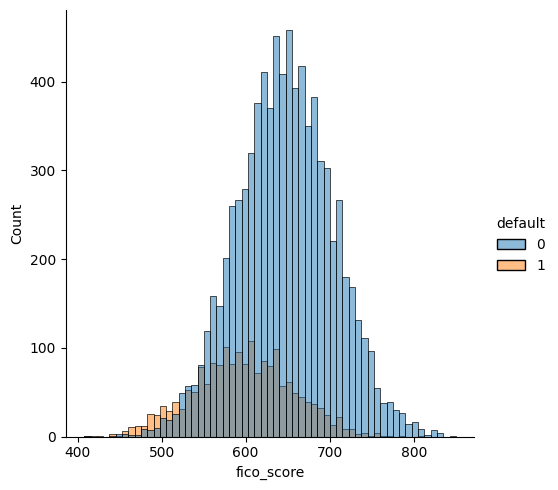

In [21]:
sns.displot(data=df, x="fico_score",hue="default")

In [9]:
# Very High Risk - 5
# High Risk
# Medium Risk
# Low Risk
# Very Low Risk - 0
# Make sure 300-850

# rating map that maps the FICO score of the borrowers to a rating where a lower rating signifies a better credit score.
fico_scores = np.array(df.fico_score)
fico_scores[fico_scores]

array([605, 572, 602, ..., 596, 647, 757])

In [81]:
def log_likelihood_fn(n_buckets, fico_scores, default,boudaries):

  # print(boudaries)
  log_likelihood = 0

  for i in range(n_buckets-1):
    b_start = boudaries[i]
    b_end = boudaries[i+1]
    print(f"{b_start} {b_end}")
    if b_end == 850:
      b_end += 1

    condition = (fico_scores >= b_start) & (fico_scores < b_end)
    indices = np.where(condition)[0]
    defaults_within_boundary = default[indices]

    n_i = len(indices)
    k_i = defaults_within_boundary[defaults_within_boundary == 1].sum()
    p_i = k_i/n_i if n_i > 0 else 0
    import math
    if math.isnan((k_i * np.log(p_i)) + ((n_i - k_i) * np.log(1 - p_i))):
        log_likelihood -= math.inf
    else:
        log_likelihood += (k_i * np.log(p_i)) + ((n_i - k_i) * np.log(1 - p_i))

  print(log_likelihood)
  print("-"*50)
  return log_likelihood

In [82]:
# log_likelihood_fn(4+1, np.array(df.fico_score), np.array(df.default))

In [83]:
def optimize(n_buckets,fico_scores, default):
  boudaries = np.linspace(min(fico_scores),max(fico_scores),n_buckets+1)
  likelihood = log_likelihood_fn(n_buckets, np.array(df.fico_score), np.array(df.default),boudaries)
  for i in range(1,len(boudaries)-1):
      shift = 25
      old_b_i = boudaries[i]
      change = 0
      for j in range(-shift,shift+1):
        boudaries[i] += j
        new_likelihood = log_likelihood_fn(n_buckets, np.array(df.fico_score), np.array(df.default), boudaries)
        if new_likelihood > likelihood:
            change = 1
            likelihood = new_likelihood
        if change == 0:
            boudaries[i] = old_b_i
  print(f"new boundaries are : {boudaries}")



In [84]:
optimize(10,np.array(df.fico_score), np.array(df.default))

408.0 452.2
452.2 496.4
496.4 540.6
540.6 584.8
584.8 629.0
629.0 673.2
673.2 717.4000000000001
717.4000000000001 761.6
761.6 805.8
-4257.923633665205
--------------------------------------------------
408.0 427.2
427.2 496.4
496.4 540.6
540.6 584.8
584.8 629.0
629.0 673.2
673.2 717.4000000000001
717.4000000000001 761.6
761.6 805.8
-4258.49494017822
--------------------------------------------------
408.0 428.2
428.2 496.4
496.4 540.6
540.6 584.8
584.8 629.0
629.0 673.2
673.2 717.4000000000001
717.4000000000001 761.6
761.6 805.8
-4258.49494017822
--------------------------------------------------
408.0 429.2
429.2 496.4
496.4 540.6
540.6 584.8
584.8 629.0
629.0 673.2
673.2 717.4000000000001
717.4000000000001 761.6
761.6 805.8
-4258.49494017822
--------------------------------------------------
408.0 430.2
430.2 496.4
496.4 540.6
540.6 584.8
584.8 629.0
629.0 673.2
673.2 717.4000000000001
717.4000000000001 761.6
761.6 805.8
-4258.49494017822
---------------------------------------------

<ipython-input-81-c98028f76678>:21: RuntimeWarning: divide by zero encountered in log
  if math.isnan((k_i * np.log(p_i)) + ((n_i - k_i) * np.log(1 - p_i))):
<ipython-input-81-c98028f76678>:21: RuntimeWarning: invalid value encountered in scalar multiply
  if math.isnan((k_i * np.log(p_i)) + ((n_i - k_i) * np.log(1 - p_i))):


yess
484.4 540.6
540.6 584.8
584.8 629.0
629.0 673.2
673.2 717.4000000000001
717.4000000000001 761.6
761.6 805.8
-inf
--------------------------------------------------
408.0 749.2
749.2 485.4
yess
485.4 540.6
540.6 584.8
584.8 629.0
629.0 673.2
673.2 717.4000000000001
717.4000000000001 761.6
761.6 805.8
-inf
--------------------------------------------------
408.0 749.2
749.2 486.4
yess
486.4 540.6
540.6 584.8
584.8 629.0
629.0 673.2
673.2 717.4000000000001
717.4000000000001 761.6
761.6 805.8
-inf
--------------------------------------------------
408.0 749.2
749.2 487.4
yess
487.4 540.6
540.6 584.8
584.8 629.0
629.0 673.2
673.2 717.4000000000001
717.4000000000001 761.6
761.6 805.8
-inf
--------------------------------------------------
408.0 749.2
749.2 488.4
yess
488.4 540.6
540.6 584.8
584.8 629.0
629.0 673.2
673.2 717.4000000000001
717.4000000000001 761.6
761.6 805.8
-inf
--------------------------------------------------
408.0 749.2
749.2 489.4
yess
489.4 540.6
540.6 584.8
584.8 